## Esma 3016, lab2
## Edgar Acuna
### Febrero 26, 2018

Organizacion y presentacion de datos cuantitativos discretos.
Usaremos el modulo pandas, que se usa para hacer analisis estadistico basico y los modulos 
matplotlib y seaborn que se usan para hacer graficas

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Leyendo datos de la internet, las columnas tienen nombres
datos=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ")
#Viendo las seis primera fila de la tabla de datos
datos.head(10)

edad sexo escuela programa creditos   gpa  familia  hestud  htv
0    21    f    publ     biol      119  3.60        3      35   10
1    18    f    priv     mbio       15  3.60        3      30   10
2    19    f    priv     biot       73  3.61        5       5    7
3    20    f    priv     mbio        *  2.38        3      14    3
4    21    m    publ     pmed      114  3.15        2      25   25
5    20    m    publ     mbio       93  3.17        3      17    6
6    22    m    publ     pmed      120  2.15        5      20   10
7    20    m    priv     pmed        *  3.86        5      15    5
8    20    m    priv     pmed       94  3.19        4      10    2
9    20    f    publ     pmed      130  3.66        6      20   33

In [7]:
# Informacion acerca de la base de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
edad        28 non-null int64
sexo        28 non-null object
escuela     28 non-null object
programa    28 non-null object
creditos    28 non-null object
gpa         28 non-null float64
familia     28 non-null int64
hestud      28 non-null int64
htv         28 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 2.0+ KB


In [8]:
# tamano de la base de datos
print(datos.shape)

(28, 9)


In [11]:
# datos estadisticos de la variable edad
str="edad"
datos.describe()[str]

count    28.000000
mean     20.607143
std       1.030616
min      18.000000
25%      20.000000
50%      20.500000
75%      21.000000
max      23.000000
Name: edad, dtype: float64

In [12]:
# Hallando las frecuencias absolutas de la variable edad
tablaf = pd.crosstab(index=datos["edad"],columns="counts")
tablaf

col_0  counts
edad         
18          1
19          1
20         12
21          9
22          4
23          1

In [13]:
#mostrando los valores unicos de edades
tablaf.index[0:6]

Int64Index([18, 19, 20, 21, 22, 23], dtype='int64', name=u'edad')

In [14]:
#mostrando solamente las frecuencias absolutas
tablaf.loc[tablaf.index[0:6]]['counts']

edad
18     1
19     1
20    12
21     9
22     4
23     1
Name: counts, dtype: int64

In [15]:
# Hallando las frecuencias relativas porcentuales
tablaf['frec.relat.porc']=tablaf*100/tablaf.sum()

In [16]:
#Hallando las frecuencias absolutas acumuladas
tablaf['frec.acum']=tablaf.counts.cumsum()

In [17]:
# Hallando las frecuencias relativas porcentuales acumuladas
tablaf['frec.relat.porc.acum']=tablaf['frec.acum']*100/tablaf['counts'].sum()

In [18]:
#Haciendo una funcion que haga la tabla completa de distribucion de frecuencias
def tablafreq(datos,str):
    #datos es el nombre de la base de datos
    #str es el nombre de la variable a usar de la base de datos
    import pandas as pd
    tab1=pd.crosstab(index=datos[str],columns="counts",colnames=['variable'])
    tab1['frec.relat.porc']=tab1*100/tab1.sum()
    tab1['frec.acum']=tab1.counts.cumsum()
    tab1['frec.relat.porc.acum']=tab1['frec.acum']*100/tab1['counts'].sum()
    return tab1;

In [19]:
tablafreq(datos,"familia")

variable  counts  frec.relat.porc  frec.acum  frec.relat.porc.acum
familia                                                           
1              1         3.571429          1              3.571429
2              3        10.714286          4             14.285714
3              9        32.142857         13             46.428571
4              6        21.428571         19             67.857143
5              8        28.571429         27             96.428571
6              1         3.571429         28            100.000000

In [20]:
#Haciendo la grafica de Linea correspondiente a la tabla de frecuencias
plt.style.use('ggplot')

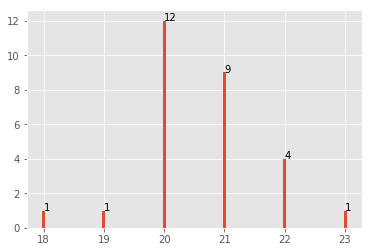

In [21]:
 with plt.style.context('ggplot'):
    # plot command goes here
    plt.bar(tablaf.index[0:6],tablaf.loc[tablaf.index[0:6]]['counts'],width=.05)
    for a,b in zip(tablaf.index[0:6],tablaf.loc[tablaf.index[0:6]]['counts']):
        plt.text(a,b,b) 
    plt.show()

In [22]:
#Leyendo datos en Excel, guardados en formato csv
datos1=pd.read_csv("http://academic.uprm.edu/eacuna/arbolejemplo.csv",sep=",")

In [23]:
datos1.head(25)

Sexo  Familia CasaPropia  AnosEmpleo  Sueldo StatusMarital Prestamo
0   Hombre        3         No          17    2500       Soltero       No
1    Mujer        5         Si          10    3000        Casado       Si
2    Mujer        4         No          15    2000         Viudo       Si
3   Hombre        3         Si          16    2800       Soltero       Si
4   Hombre        6         Si          11    4000         Viudo       Si
5    Mujer        4         Si          26    3200       Soltero       Si
6    Mujer        2         Si          14    1800       Soltero       No
7   Hombre        5         Si          10    3750        Casado       No
8   Hombre        6         No          18    2970    Divorciado       No
9   Hombre        4         Si          12    3350    Divorciado       No
10  Hombre        1         No          23    1950       Soltero       Si
11   Mujer        2         Si          25    2740       Soltero       Si
12   Mujer        3         No           7    3100       Soltero       No
13  Hombre        5         Si           5    3845    Divorciado       No
14  Hombre        8         No          13    3200        Casado       No
15   Mujer        3         Si           9    2800       Soltero       Si
16  Hombre        2         No           6    3200       Soltero       Si
17  Hombre        3         Si           7    3815         Viudo       No
18   Mujer        2         Si          11    2980    Divorciado       No
19  Hombre        4         Si          15    2800         Viudo       Si
20   Mujer        1         No           6    3125    Divorciado       Si
21  Hombre        1         No           8    3500       Soltero       No
22  Hombre        4         No          22    4500    Divorciado      NaN
23  Hombre        2         Si          10    3200        Casado       Si
24  Hombre        3         Si           9    3000        Casado       Si